In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import NonNeg
from tensorflow.keras.initializers import Constant

In [34]:
data_path = './data/ds1.csv'
test_size = .2
epochs = 500
batch_size = 32

In [35]:
df = pd.read_csv(data_path)

df['cum_number_of_fault'] = df['number_of_fault'].cumsum()

df

,testing_date,number_of_fault,cum_number_of_fault
0,1,6,6
1,2,1,7
2,3,1,8
3,4,0,8
4,5,1,9
...,...,...,...
57,58,1,130
58,59,0,130
59,60,1,131
60,61,0,131


In [36]:
X = df[['testing_date']]
y = df[['cum_number_of_fault']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

In [37]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [38]:
model = Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(128, activation='tanh', kernel_constraint=NonNeg()))
# model.add(Dense(128, activation='tanh', kernel_constraint=NonNeg()))
# model.add(Dense(1, activation='linear', kernel_constraint=NonNeg()))

model.add(Dense(500, activation='tanh'))
model.add(Dense(500, activation='tanh'))
model.add(Dense(1))
# model.add(Dense(1, use_bias=False, kernel_initializer=Constant(value=1.0)))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), 
                    # sample_weight=np.arange(1, X_train.size+1)
                    )

Epoch 1/500


/Users/zama/miniforge3/envs/python3_11_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.8277 - val_loss: 0.4277
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2038 - val_loss: 0.3827
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0607 - val_loss: 0.6211
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1204 - val_loss: 0.8100
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1060 - val_loss: 0.0311
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0665 - val_loss: 0.2866
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0650 - val_loss: 0.2016
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0412 - val_loss: 0.0388
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0432 - val_loss: 0.2146
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0455 - val_loss: 0.1320
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0356 - val_loss: 0.0298
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0265 - val_loss: 0.0698
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3158


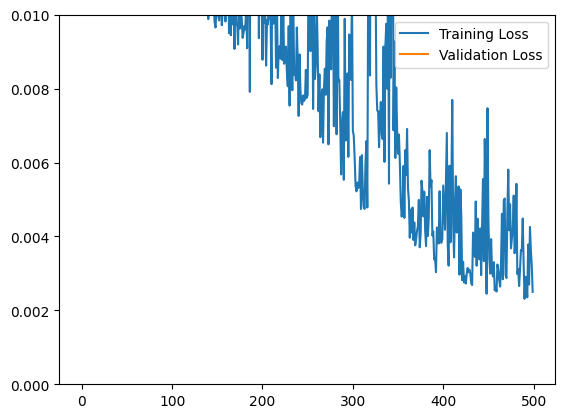

In [39]:
loss = model.evaluate(X_test, y_test)

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.ylim(0, .01)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


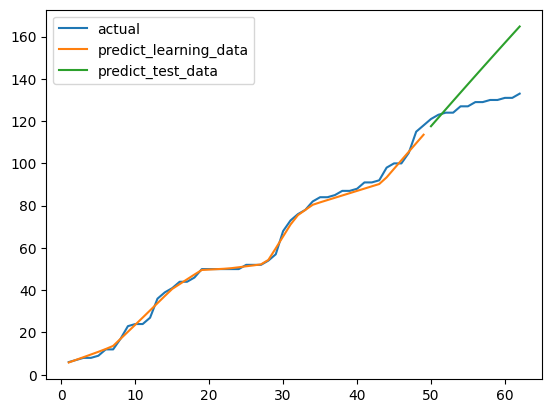

In [40]:
y_pred_lea = model.predict(X_train)
y_pred = model.predict(X_test)

plt.plot(df['testing_date'], df['cum_number_of_fault'], label='actual')
plt.plot(scaler_X.inverse_transform(X_train), scaler_y.inverse_transform(y_pred_lea), label='predict_learning_data')
plt.plot(scaler_X.inverse_transform(X_test), scaler_y.inverse_transform(y_pred), label='predict_test_data')
plt.legend()
plt.show()